# Ornstein-Uhlenbeck Model

In finance, the OU process is often used to model the evolution of a commoditiy's price over time. In this context, the OU process is used to capture the tendency of prices to return to their long-term average, while allowing for random fluctuations around that average.

$$ dX_t = \lambda(\mu-X)dt++\sigma dW_t. $$

Here

- $\lambda$ is the speed of mean reversion and determines how fast the process drifts to the mean reversion level $\mu$,
- $\mu$ denotes the mean reversion level,
- $\sigma$ is the volatiity of the process.

The OU model has several properties that make it useful for modeling real-world phenomena. For example, it is a stationary process, meaning that its statistical properties do not change over time. It is also Markovian, meaning that its future behavior depends only on its current state, not on its past history.

In [12]:
import sys
sys.path.append('../../../..')
import numpy as np
import matplotlib.pyplot as plt
import rivapy

## Simulation of Spot

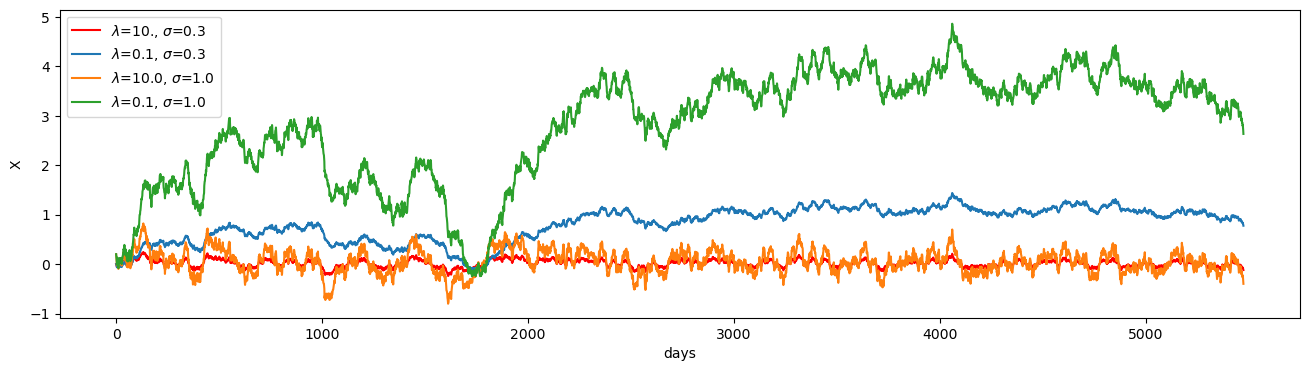

In [7]:
timegrid = np.arange(0.0,15.0,1.0/365.0) # simulate on daily timegrid over 5yrs horizon

plt.figure(figsize=(16,4))
ou_model = rivapy.models.OrnsteinUhlenbeck(speed_of_mean_reversion = 10.0, volatility=0.3)
rnd = np.random.normal(size=(timegrid.shape[0],1))
sim = ou_model.simulate(timegrid, start_value=0.0, rnd=rnd)
plt.plot(sim[:,0],'-r', label='$\lambda$=10., $\sigma$=0.3')
ou_model = rivapy.models.OrnsteinUhlenbeck(speed_of_mean_reversion = 0.1, volatility=0.3)
sim = ou_model.simulate(timegrid, start_value=0.0,rnd=rnd)
plt.plot(sim[:,0], label='$\lambda$=0.1, $\sigma$=0.3')
ou_model = rivapy.models.OrnsteinUhlenbeck(speed_of_mean_reversion = 10.0, volatility=1.0)
sim = ou_model.simulate(timegrid, start_value=0.2,rnd=rnd)
plt.plot(sim[:,0], label='$\lambda$=10.0, $\sigma$=1.0')
ou_model = rivapy.models.OrnsteinUhlenbeck(speed_of_mean_reversion = 0.1, volatility=1.0)
sim = ou_model.simulate(timegrid, start_value=0.2,rnd=rnd)
plt.plot(sim[:,0], label='$\lambda$=0.1, $\sigma$=1.0')
plt.xlabel('days')
plt.ylabel('X')
plt.legend();

## Calibration

The model may be calibrated to data. Here, the data must be given on a uniform grid. The calibration can either be done by maximum likelihood or by minimum least square.

Here, to test the calibration, we simulate paths of an Ornstein-Uhlenbeck process and calibrate to this simulated data.

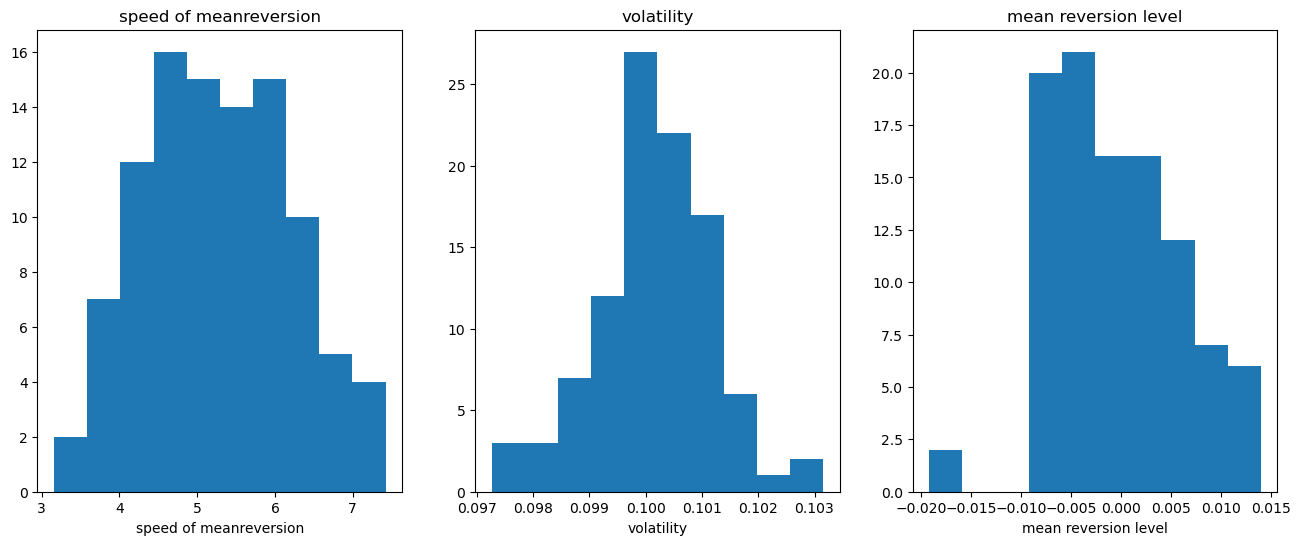

In [11]:
timegrid = np.arange(0.0,5.0,1.0/365.0) # simulate on daily timegrid over 5yrs horizon

iters = 100 # number of calibrations performed on simualted data
mean_reversion_speed, volatility, mean_level = np.empty((iters,)), np.empty((iters,)), np.empty((iters,))

for i in range (iters):
    ou_model = rivapy.models.OrnsteinUhlenbeck(speed_of_mean_reversion = 5.0, volatility=0.1)
    sim = ou_model.simulate(timegrid, start_value=0.2,rnd=np.random.normal(size=(timegrid.shape[0],1)))
    ou_model.calibrate(sim.reshape((-1)),dt=1.0/365.0, method = 'minimum_least_square')
    mean_reversion_speed[i] = ou_model.speed_of_mean_reversion
    volatility[i] = ou_model.volatility
    mean_level[i] = ou_model.mean_reversion_level
    
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.hist(mean_reversion_speed, bins=10)
plt.title('speed of meanreversion')
plt.xlabel('speed of meanreversion')
plt.subplot(1,3,2)
plt.hist(volatility, bins=10)
plt.title('volatility')
plt.xlabel('volatility')
plt.subplot(1,3,3)
plt.hist(mean_level, bins=10)
plt.title('mean reversion level')
plt.xlabel('mean reversion level');